<a href="https://colab.research.google.com/github/cheesuschris/320Homeworks/blob/main/Homework1a_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Homework 1 Part 1: Pandas

Today we'll practice data exploration in pandas! Each of these cells should consist of *one or two lines of pandas**, answering the question.

**Dataset Information:**
First, you'll need to download the dataset "Top American Colleges 2022" (https://www.kaggle.com/datasets/kabhishm/top-american-colleges-2022) from Kaggle.com and get it into this directory. You'll need to make an account on kaggle first. This step is for you to work on your solution locally. While submitting on Gradescope, the dataset will be automatically provided.

**Data format while submitting on Gradescope:**
- The dataset is automatically provided when your code is graded
- File name: Read the file at `colleges_2022.csv` directly. Any other file name or unnecessary paths will yield errors on Gradescope.
- You can assume this file exists in your working directory

**Important: For grading purposes, you must store your results in the SPECIFIC VARIABLE NAMES mentioned in each question.**

Below is a list of useful functions. Part of this homework is practicing reading the documentation, so you'll want to look them up as you go. I'd recommend starting with this: https://pandas.pydata.org/docs/user_guide/10min.html. Once you've read that, in general you can find the API for any of these functions by searching their name plus pandas.

List of helpful functions:

* read_csv
* head
* unique
* groupby
* apply (An important note about this one--pay careful attention to the weird axis argument. When you apply over a series, you often don't need it, but when you apply over a dataframe axis=1 and axis=0 will do very different things.)
* value_counts
* df.columns ('columns' is a dataframe variable that tracks the columns)
* isin
* fillna
* astype
* hist

***Remember, all answers must be in ONE OR TWO LINES OF CODE. ***

## The Basics

First, read the dataframe in. Store it in a variable called **"df"**.

In [ ]:
import pandas as pd
df = pd.read_csv("colleges_2022.csv")

Let's get a feel for our dataframe. In the variable **"df_columns"**, store a list of all of the data frame's columns (in order). Print it out.

In [ ]:
df_columns = df.columns
print(df_columns)

Index(['description', 'rank', 'organizationName', 'state', 'studentPopulation',
       'campusSetting', 'medianBaseSalary', 'longitude', 'latitude', 'website',
       'phoneNumber', 'city', 'country', 'state.1', 'region', 'yearFounded',
       'stateCode', 'collegeType', 'carnegieClassification',
       'studentFacultyRatio', 'totalStudentPop', 'undergradPop',
       'totalGrantAid', 'percentOfStudentsFinAid', 'percentOfStudentsGrant'],
      dtype='object')


Compute a new data frame containing just the first 10 rows. Store it in **"df_ten"** and print it. There's a single function that does it by default.

In [ ]:
df_ten = df.head(10)
print(df_ten)

                                         description  rank  \
0  A leading global research university, MIT attr...     1   
1  Stanford University sits just outside of Palo ...     2   
2  One of the top public universities in the coun...     2   
3  Princeton is a leading private research univer...     4   
4  Located in upper Manhattan, Columbia Universit...     5   
5  The University of California, Los Angeles is t...     6   
6  Located in rural Williamstown, MA, Williams Co...     7   
7  Yale University is the second oldest Ivy Leagu...     8   
8  Duke offers 53 undergraduate majors at its Dur...     9   
9  Founded by Benjamin Franklin, The University o...    10   

                        organizationName state  studentPopulation  \
0  Massachusetts Institute of Technology    MA              12195   
1                    Stanford University    CA              20961   
2     University of California, Berkeley    CA              45878   
3                   Princeton University 

## Exploration

Now let's learn to do some exploration. Calculate the median of "medianBaseSalary" and store the result in a variable called **"median_salary"**.

In [ ]:
median_salary = df["medianBaseSalary"].median()

Making it a little more complicated--calculate the median of "medianBaseSalary" but only for urban colleges. Store the result in a variable called **"urban_median"**.

In [ ]:
urban_median = df[df['campusSetting'] == "Urban"]["medianBaseSalary"].median()

Now, still using one statement, calculate the median of "medianBaseSalary" for all different possible values of "campusSetting". You'll need a statement we haven't used yet. Store the result in a variable called **"campus_medians"**.

In [ ]:
campus_medians = df.groupby("campusSetting")["medianBaseSalary"].median()

Count the number of colleges by state. Your results should look something like:

NY    63<br>
CA    55

etc.

Store the result in a variable called **"state_counts"** and print it.

In [ ]:
state_counts = df.groupby("state").size()
print(state_counts)

state
AL     5
AR     2
AZ     4
CA    55
CO     7
CT     8
DC     5
DE     1
FL    14
GA     9
HI     2
IA     5
ID     3
IL    16
IN    12
KS     2
KY     4
LA     4
MA    27
MD    12
ME     4
MI    15
MN    12
MO     8
MS     2
MT     2
NC    11
ND     2
NE     3
NH     4
NJ    16
NM     3
NV     2
NY    63
OH    15
OK     3
OR     9
PA    33
PR     1
RI     5
SC     6
SD     2
TN     9
TX    26
UT     4
VA    14
VT     4
WA    13
WI     8
WV     1
WY     1
dtype: int64


Find and display just the line(s) for University of Maryland (at least one of them). There are a couple of ways of doing this. Store the result in a variable called **"umd_schools"**.

In [ ]:
umd_schools = df[df["organizationName"] == "University of Maryland, College Park"]
print(umd_schools)

                                          description  rank  \
39  The University of Maryland, College Park, is a...    40   

                        organizationName state  studentPopulation  \
39  University of Maryland, College Park    MD              44404   

   campusSetting  medianBaseSalary  longitude   latitude             website  \
39      Suburban          124500.0 -76.937269  38.980725  http://www.umd.edu   

    ... yearFounded stateCode collegeType  \
39  ...      1858.0        MD      Public   

                               carnegieClassification studentFacultyRatio  \
39  Doctoral Universities: Very High Research Acti...                  17   

    totalStudentPop undergradPop totalGrantAid percentOfStudentsFinAid  \
39            44404        32954    28679244.0                    67.0   

    percentOfStudentsGrant  
39                    53.0  

[1 rows x 25 columns]


## Modifications

Let's start modifying our dataframe! Remember, dataframe operations return a copy by default, so you'll either need to use the inplace=True, or just assign the dataframe back into itself (as in, df = df.someFunction()).

Fill in all blank phone numbers with "no number". Make sure to modify the **df** dataframe directly (either with inplace=True or by reassigning df).

In [ ]:
df["phoneNumber"] = df["phoneNumber"].fillna("no number")

Take the website column and change it so that no string includes "http://", "https://" or "www.". Make sure to modify the **df** dataframe directly.

In [ ]:
df["website"] = df["website"].str.removeprefix("http://").str.removeprefix("https://").str.removeprefix("www.")
print(df["website"])

0        web.mit.edu
1       stanford.edu
2       berkeley.edu
3      princeton.edu
4       columbia.edu
           ...      
493        sjcny.edu
494     moravian.edu
495          ltu.edu
496              NaN
497       mephis.edu
Name: website, Length: 498, dtype: object


Create a new column called "faculty" that computes the number of faculty at each university. Add this column to the **df** dataframe. Round the result to the nearest integer.

In [ ]:
df["faculty"] = df['studentFacultyRatio'] * df["totalStudentPop"]

## Graphs

Let's do some very basic graphing here! Create a histogram for the student population. Store the figure under the variable name **"student_pop_hist_fig"** and axes under **"student_pop_hist_ax"**.

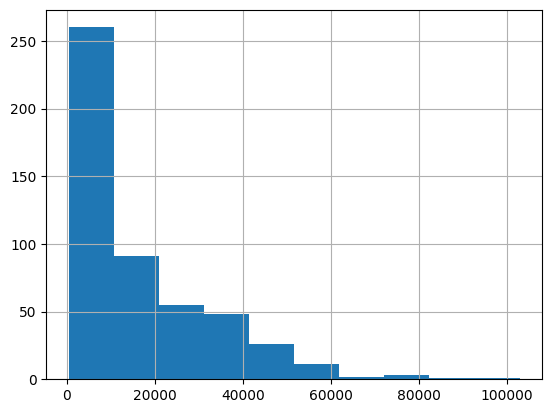

In [ ]:
import matplotlib.pyplot as plt

student_pop_hist_ax = df["studentPopulation"].hist()
student_pop_hist_fig = student_pop_hist_ax.get_figure()

student_pop_hist_fig.show()